In [1]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import svd

In [2]:
# set path to folder we need data from
path = './data/daily/'

In [3]:
# get file names from files in daily folder
names = [ file[:-4] for file in os.listdir(path) if file.endswith('.csv') ]
# print out file names
print(names)

['googl_daily', 'goog_daily', 'msft_daily', 'amzn_daily', 'fb_daily', 'aapl_daily', 'baba_daily']


In [28]:
def only_price(stocks, n=3):
    """
    takes a list of stock symbls and the n number of symbls needed,
    randomly picks n symbls from the list,
    loops through the choose symbls and loads the data for that symbl into a dataframe,
    drops all columns other than date and price,
    concats all of the dataframes into one dataframe.
    returns a dataframe with the daily prices of the selected stocks.
    
    symbls: list, stock symbls should match files names of the data.
    n: int, number of symbls you want to use, default = 3.
    
    return: prices dataframe df, index = date, cols = prices for selected stocks
    """
    # change this seed or remvoe to get different symbls, used for reproducibility 
    random.seed(42)
    
    # select n symbls from the list
    stocks = random.sample(stocks, k=n)
    
    # create list to hold df's
    dfs = []
    
    # loop through symbls, load data, append to list of dfs
    for i in range(len(stocks)):
        stock = (
            pd.read_csv(f'./data/daily/{stocks[i]}.csv')
            .drop(columns=['Volume', 'SMAVG (15)'])
            .rename(columns={'Last Price': f'{stocks[i]}_price'})
            .set_index(['Date'])
        )
        dfs.append(stock)

    # create one dataframe from list of dataframes, reverse order so oldest data first
    df = pd.concat(dfs, axis=1).iloc[::-1]

    return df

In [5]:
# create df of daily prices from 3 stocks
prices = only_price(names, 3)

# print
prices.head()

,aapl_daily_price,googl_daily_price,baba_daily_price
Date,,,
1/9/2015,112.01,500.72,103.02
1/12/2015,109.25,497.06,101.62
1/13/2015,110.22,501.80,100.77
1/14/2015,109.80,505.93,99.58
1/15/2015,106.82,504.01,96.31


In [6]:
# use pct_change() to get the daily price changes in percentages
prices_pct = prices.pct_change().dropna()
# print out the first 5 rows of the dataframe with percent changes
prices_pct.head()

,aapl_daily_price,googl_daily_price,baba_daily_price
Date,,,
1/12/2015,-0.024641,-0.007309,-0.013590
1/13/2015,0.008879,0.009536,-0.008364
1/14/2015,-0.003811,0.008230,-0.011809
1/15/2015,-0.027140,-0.003795,-0.032838
1/16/2015,-0.007770,0.012787,0.006022


In [7]:
# use to pandas describe to examine the prcies changes of each stock
prices_pct.describe()

,aapl_daily_price,googl_daily_price,baba_daily_price
count,1272.000000,1272.000000,1272.000000
mean,0.000957,0.000949,0.000754
std,0.015619,0.014930,0.019985
min,-0.099607,-0.075019,-0.087760
25%,-0.005926,-0.005810,-0.010488
50%,0.000889,0.001111,0.000582
75%,0.008924,0.008371,0.011791
max,0.070422,0.162584,0.132919


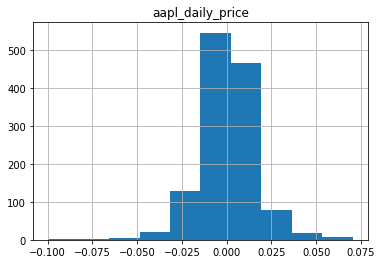

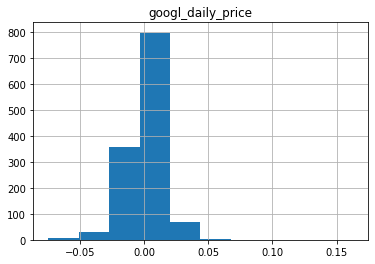

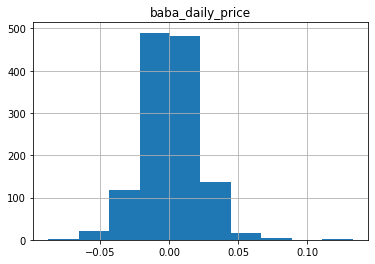

In [8]:
# plot distributions of prices chages for each stock
for col in prices_pct:
    prices_pct.hist(column=col)

## SVD components
Let A = U Sigma V^T

* where A is a real m x n matrix that we want to decompose
* U is an m x m matrix, left singular vectors, eigenvectors of AA^T
* Sigma is an m x n diagonal matrix with singular values along the diagon
* V^T is the transpose of an n x n matrix V 

In [10]:
# set prices = to A
A = np.array(prices_pct)
print(f'prices_pct dataframe as matrix A:\n\n{A}\n')

# use svd from scipy to get U, Sigma, and V^T
U, s, VT = svd(A)
print(f'm x m Matrix U:\n\n{U}\n\n')
print(f'Sigmas:\n\n{s}\n\n')
print(f'n x n Matrix V^T:\n\n{VT}\n')

prices_pct dataframe as matrix A:

[[-0.02464066 -0.00730947 -0.01358959]
 [ 0.00887872  0.00953607 -0.0083645 ]
 [-0.00381056  0.00823037 -0.01180907]
 ...
 [ 0.02828937  0.01311001  0.0231664 ]
 [ 0.02093236  0.00427439  0.00851448]
 [-0.0014491  -0.00168188 -0.01622488]]

m x m Matrix U:

[[-2.94859762e-02  2.01005399e-02 -2.86048155e-02 ...  5.07162536e-02
   3.78833348e-02 -2.45492390e-03]
 [ 2.89431859e-03 -3.11594545e-02 -8.20108976e-03 ...  1.19377293e-03
   1.28046174e-02  2.07913682e-03]
 [-7.85985703e-03 -1.79700278e-02 -2.70905225e-02 ...  1.34132689e-02
  -1.26515524e-04 -2.47216568e-02]
 ...
 [ 4.30006659e-02 -1.66086442e-02  2.50782362e-02 ...  9.97367123e-01
  -1.85668067e-03  4.30696444e-04]
 [ 2.13593261e-02 -1.96289136e-02  2.75047445e-02 ... -1.83998142e-03
   9.98461130e-01  4.50067961e-05]
 [-1.58074986e-02 -1.89454810e-02 -3.56765301e-03 ...  4.37376844e-04
   4.98797617e-05  9.99390956e-01]]


Sigmas:

[0.85696481 0.48059764 0.37236393]


n x n Matrix V^T:

[[ 0

## get sample covariance matrix then use SVD decomposition

Sample covariance matrix --> S = AA^T/(n-1)

In [11]:
# printout A then A transpose
print(A)
A.shape

[[-0.02464066 -0.00730947 -0.01358959]
 [ 0.00887872  0.00953607 -0.0083645 ]
 [-0.00381056  0.00823037 -0.01180907]
 ...
 [ 0.02828937  0.01311001  0.0231664 ]
 [ 0.02093236  0.00427439  0.00851448]
 [-0.0014491  -0.00168188 -0.01622488]]


(1272, 3)

In [12]:
print(A.T)
A.T.shape

[[-0.02464066  0.00887872 -0.00381056 ...  0.02828937  0.02093236
  -0.0014491 ]
 [-0.00730947  0.00953607  0.00823037 ...  0.01311001  0.00427439
  -0.00168188]
 [-0.01358959 -0.0083645  -0.01180907 ...  0.0231664   0.00851448
  -0.01622488]]


(3, 1272)

In [13]:
# get sample covariance matrix S using formula above, printout S

S = ( np.matmul(A, A.T) / (A.shape[0] - 1) )
print(S)
S.shape

[[ 6.65041282e-07 -1.37538189e-07  1.52805278e-07 ... -8.71532548e-07
  -5.21431084e-07  2.11243096e-07]
 [-1.37538189e-07  1.88617698e-07  1.12847697e-07 ...  1.43521741e-07
   1.22261215e-07  8.40348405e-08]
 [ 1.52805278e-07  1.12847697e-07  1.74440214e-07 ... -2.15162635e-07
  -1.14187532e-07  1.44201529e-07]
 ...
 [-8.71532548e-07  1.43521741e-07 -2.15162635e-07 ...  1.18713045e-06
   6.65185141e-07 -3.45330993e-07]
 [-5.21431084e-07  1.22261215e-07 -1.14187532e-07 ...  6.65185141e-07
   4.16152902e-07 -1.38212864e-07]
 [ 2.11243096e-07  8.40348405e-08  1.44201529e-07 ... -3.45330993e-07
  -1.38212864e-07  2.10995664e-07]]


(1272, 1272)

In [14]:
# factorize S using SVD
U, s, VT = svd(S)

In [15]:
print(U)
U.shape

[[-0.02948598  0.02010054 -0.02860482 ... -0.09757816  0.04557868
   0.03941344]
 [ 0.00289432 -0.03115945 -0.00820109 ...  0.38535654 -0.06384289
  -0.16206285]
 [-0.00785986 -0.01797003 -0.02709052 ... -0.14866438 -0.00057564
   0.04205454]
 ...
 [ 0.04300067 -0.01660864  0.02507824 ...  0.02621519 -0.00731953
   0.01349134]
 [ 0.02135933 -0.01962891  0.02750474 ...  0.01286309 -0.01179549
  -0.0168575 ]
 [-0.0158075  -0.01894548 -0.00356765 ... -0.01339926  0.00744269
   0.00208502]]


(1272, 1272)

In [16]:
print(s)
s.shape

[5.77803839e-04 1.81726273e-04 1.09091186e-04 ... 3.69850435e-20
 1.82011539e-20 2.12057288e-21]


(1272,)

In [17]:
print(VT)
VT.shape

[[-0.02948598  0.00289432 -0.00785986 ...  0.04300067  0.02135933
  -0.0158075 ]
 [ 0.02010054 -0.03115945 -0.01797003 ... -0.01660864 -0.01962891
  -0.01894548]
 [-0.02860482 -0.00820109 -0.02709052 ...  0.02507824  0.02750474
  -0.00356765]
 ...
 [ 0.06871878  0.0638539   0.03619046 ... -0.00887871 -0.0029082
   0.0131112 ]
 [ 0.         -0.05209138 -0.0561307  ... -0.01741939  0.00907971
  -0.01608806]
 [-0.99496927  0.02300252  0.00279144 ... -0.00519717 -0.00223782
   0.00146857]]


(1272, 1272)

## Correlation matrix of pct changes of daily prices

In [25]:
corr = pd.DataFrame.corr(prices_pct)
corr

,aapl_daily_price,googl_daily_price,baba_daily_price
aapl_daily_price,1.000000,0.524229,0.431591
googl_daily_price,0.524229,1.000000,0.481857
baba_daily_price,0.431591,0.481857,1.000000


(3.0, 0.0)

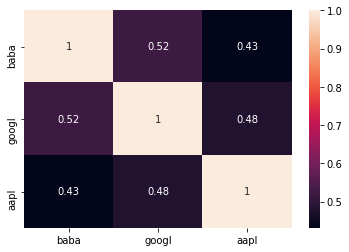

In [26]:
ticks = ['baba', 'googl', 'aapl']

ax = sn.heatmap(corr, annot=True, yticklabels=ticks, xticklabels=ticks)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Create a 3D scatter plot of percent changes of the stocks

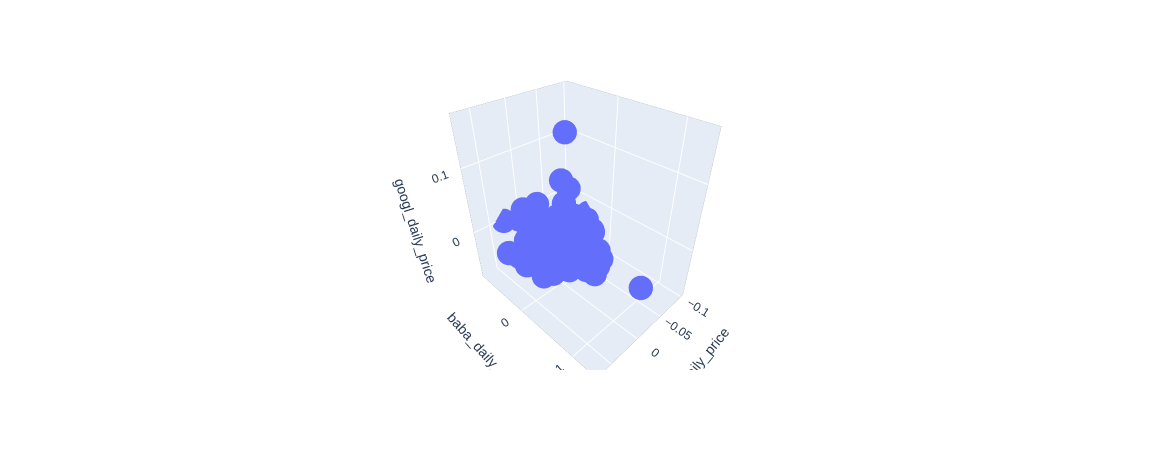

In [29]:
# TODO: update and fix scatter plot

import plotly.express as px

data = prices_pct

fig = px.scatter_3d( data,
    x = 'aapl_daily_price',
    y = 'baba_daily_price',
    z = 'googl_daily_price',
)

fig.show()